# Introdution

The data set is comprised of 205 observations and 26 attributes.
your primary task is to apply feature selection and/or dimensionality reduction techniques to identify the explanatory variables to be included within a linear regression model that predicts automobile gas mileage.
The city-mpg variable will serve as the response variable for your regression model.
We will do some exploratory data analysis (EDA) and apply the knowledge of feature selection and dimensionality reduction to the 25 candidate explanatory variables to identify variables that I believe will prove to be relatively useful within the required linear regression model. 
We will do some test to see which modle will be most accurent for predicting the response variable here.


Step1:Upload and read the date, do some basic cleaning for the data if necessary.

Step2:We will perform some basic exploratory data analysis (EDA) to ensure you understand the nature of each of the variables;

Step3:By feature selection and dimensionality reduction to the 25 candidate explanatory variables to identify variables that I believe will prove to be relatively useful within the required linear regression model. make some test to see which model has higher accurency.

Step4:Conclusions.

# Step1

In [18]:
import pandas as pd
filename = 'https://raw.githubusercontent.com/YALINYAN-YU/DAV6150/master/M4_Data.csv'
df = pd.read_csv(filename)
df.head()



,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250


In [24]:
#regarding to the UCI web page dataset describetions, now we need to change the columns name to the real ones
#see what is the previous columns name
df.columns


Index(['3', '?', 'alfa-romero', 'gas', 'std', 'two', 'convertible', 'rwd',
       'front', '88.6', '168.8', '64.1', '48.8', '2548', 'dohc', 'four', '130',
       'mpfi', '3.47', '2.68', '9', '111', '5000', '21', '27', '13495'],
      dtype='object')

In [77]:
#change the name for each columns base on the information in the website.

df01 = df.rename(columns={'3': 'symboling','?': 'normalized-losses','alfa-romero': 'make','gas':'fuel-type','std':'aspiration',
                          'two':'num-of-doors','convertible':'body-style','rwd':'drive-wheels','front':'engine-location','88.6':'wheel-base',
                          '168.8':'length', '64.1':'width', '48.8':'height', '2548':'curb-weight', 'dohc':'engine-type', 'four':'num-of-cylinders',
                          '130':'engine-size','mpfi':'fuel-system', '3.47':'bore', '2.68':'stock', '9':'compression-ratio', '111':' horsepower',
                          '5000':'peak-rpm', '21':'city_mpg', '27':'highway-mpg', '13495':'price'})
df01.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stock,compression-ratio,horsepower,peak-rpm,city_mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250


In [78]:
# see columns name
df01.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stock',
       'compression-ratio', ' horsepower', 'peak-rpm', 'city_mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [79]:
#check the data type
df01.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stock                 object
compression-ratio    float64
 horsepower           object
peak-rpm              object
city_mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [80]:
#finding the null values
print(df01.isnull().sum())

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stock                0
compression-ratio    0
 horsepower          0
peak-rpm             0
city_mpg             0
highway-mpg          0
price                0
dtype: int64


In [30]:
df01.shape


(204, 26)

In [81]:
df01

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stock,compression-ratio,horsepower,peak-rpm,city_mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.00,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.00,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.50,110,5500,19,25,15250
5,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.50,110,5500,19,25,17710
6,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.50,110,5500,19,25,18920
7,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.30,140,5500,17,20,23875
8,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.4,7.00,160,5500,16,22,?
9,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.5,2.8,8.80,101,5800,23,29,16430


# Step 2

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002409DAD0BA8>,
      dtype=object)

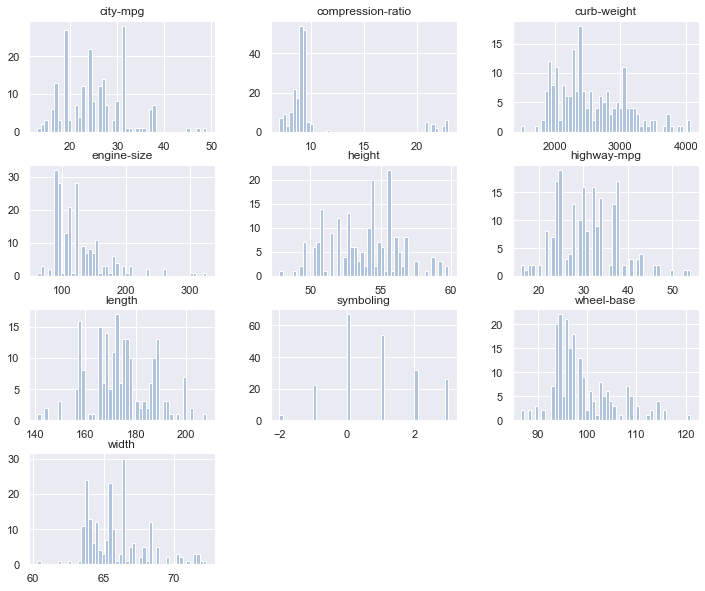

In [32]:
#check the distribution for each attributes - histagram
df01.hist(bins=50, color='lightsteelblue', figsize=(12,10))

We can see most of the numeric values are normal distribution, some of them are right-skewed and some are left-skewed, 
but follow the normal distribution.

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

UsageError: Line magic function `%` not found.


Text(0.5, 1.0, 'box plot of city_mpg')

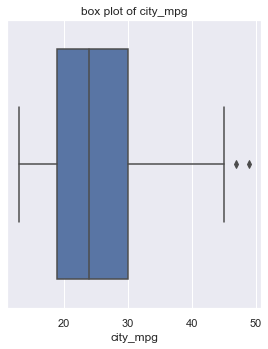

In [135]:
# Let's see the box plot for the response variable.
plt.figure(figsize=(10,18))
#boxplot of city-mpg
plt.subplot(321)
sns.boxplot(x=df01['city_mpg'])
plt.title('box plot of city_mpg')

Text(0.5, 1.0, 'box plot of compression-ratio')

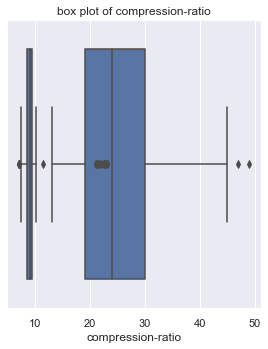

In [134]:
# compression-ratio is most unlikely a normal distribution, so we will see the box plot for this variable.

plt.subplot(321)
sns.boxplot(x=df01['compression-ratio'])
plt.title('box plot of compression-ratio')


In [136]:
# we can see a lot outliners in this column.

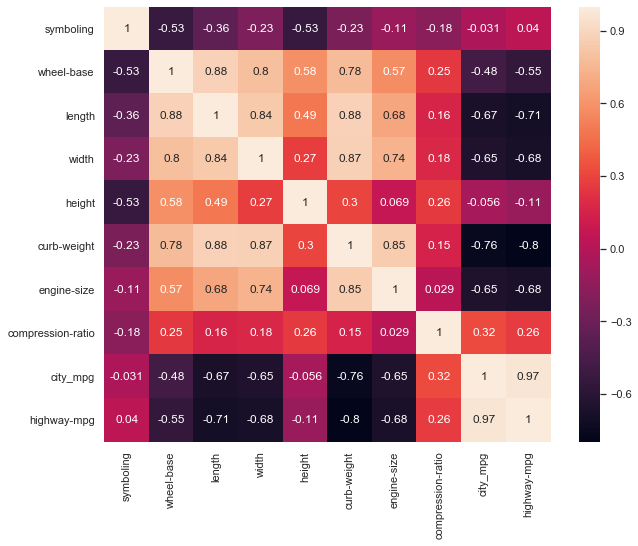

In [83]:
# find the correlation between each 2 varaibles by heatmap
from sklearn.model_selection import cross_val_scorea
auto_corr = df01.corr()
sns.heatmap(auto_corr, annot=True)
sns.set(rc={'figure.figsize':(10,8)})

In [41]:
#get the correlation to ecah columns , even the value are not in numbers.

df01.apply(lambda x: x.factorize()[0]).corr()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stock,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.163874,0.218640,0.238188,0.044019,0.621552,0.421480,-0.071845,-0.196036,0.389964,...,0.021648,-0.024042,0.010906,0.089326,0.159808,0.353915,0.073757,0.167157,-0.009884,0.285447
normalized-losses,0.163874,1.000000,0.695626,0.061453,-0.036161,0.086792,0.000185,0.074291,-0.164629,0.503482,...,0.209764,-0.048496,0.082312,0.307878,0.216860,0.463538,0.254375,0.222966,0.216980,0.631790
make,0.218640,0.695626,1.000000,0.111119,0.050280,0.118179,0.137243,-0.007366,0.053951,0.737805,...,0.330837,-0.052135,0.313964,0.363406,0.285697,0.613199,0.404152,0.130951,0.170970,0.932510
fuel-type,0.238188,0.061453,0.111119,1.000000,0.400964,0.206550,0.155933,-0.134736,-0.040278,0.145041,...,0.020511,0.682262,0.424000,0.014220,0.480859,0.199951,0.219063,0.384541,0.092449,0.138135
aspiration,0.044019,-0.036161,0.050280,0.400964,1.000000,0.064392,0.016513,-0.069545,-0.057505,0.108073,...,-0.061806,0.472583,0.209899,0.071583,0.267071,-0.060949,-0.020287,-0.073499,-0.284369,0.081909
num-of-doors,0.621552,0.086792,0.118179,0.206550,0.064392,1.000000,0.433697,0.106444,-0.137677,0.277825,...,-0.093727,-0.014291,0.046002,-0.062076,0.038878,0.156753,0.011432,0.126730,0.050976,0.146093
body-style,0.421480,0.000185,0.137243,0.155933,0.016513,0.433697,1.000000,-0.070778,0.126716,0.216656,...,0.118533,-0.062684,0.086007,0.162787,0.078084,0.241665,0.122710,0.063651,-0.019265,0.166507
drive-wheels,-0.071845,0.074291,-0.007366,-0.134736,-0.069545,0.106444,-0.070778,1.000000,-0.149134,-0.061619,...,-0.372676,0.032556,-0.239170,-0.170726,-0.132882,-0.187493,-0.083779,0.200248,0.247397,-0.094755
engine-location,-0.196036,-0.164629,0.053951,-0.040278,-0.057505,-0.137677,0.126716,-0.149134,1.000000,0.095706,...,0.159861,-0.083175,0.194639,0.168638,-0.046580,0.111938,0.185129,-0.094090,-0.129586,0.055227
wheel-base,0.389964,0.503482,0.737805,0.145041,0.108073,0.277825,0.216656,-0.061619,0.095706,1.000000,...,0.347142,-0.053299,0.363005,0.276478,0.311945,0.565221,0.308747,0.002084,0.088989,0.746226


# Step 3

In [113]:
# load numpy + 'datasets'. We'll use the "iris" data that is provided with sklearn
import numpy as np
from sklearn import datasets
import warnings
warnings.filterwarnings('ignore')

# load PCA + SVM classifier ("SVC") + cross validation functions
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn import model_selection

# load the iris dataset
#df001 = datasets.df01()

# what is the dimensionality of the data?
df01.shape


(204, 26)

In [115]:
df01.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stock                 object
compression-ratio    float64
 horsepower           object
peak-rpm              object
city_mpg               int64
highway-mpg            int64
price                 object
dtype: object

# Test 1

In [165]:
# assign the explanatory variables to a Python object
#since in column 'normalization-losses' contains '?', so will drop this column too
#base on the previous analysis, here will drop all the object columns
X = df01.copy()
X.drop('city_mpg', axis=1, inplace=True)
X.drop('normalized-losses', axis=1, inplace=True)
X.drop('make', axis=1, inplace=True)
X.drop('fuel-type', axis=1, inplace=True)
X.drop('aspiration', axis=1, inplace=True)
X.drop('num-of-doors', axis=1, inplace=True)
X.drop('body-style', axis=1, inplace=True)
X.drop('drive-wheels', axis=1, inplace=True)
X.drop('engine-location', axis=1, inplace=True)
X.drop('engine-type', axis=1, inplace=True)
X.drop('num-of-cylinders', axis=1, inplace=True)
X.drop('fuel-system', axis=1, inplace=True)
X.drop('bore', axis=1, inplace=True)
X.drop('stock', axis=1, inplace=True)
X.drop(' horsepower', axis=1, inplace=True)
X.drop('peak-rpm', axis=1, inplace=True)
X.drop('price', axis=1, inplace=True)


X.head()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,highway-mpg
0,3,88.6,168.8,64.1,48.8,2548,130,9.0,27
1,1,94.5,171.2,65.5,52.4,2823,152,9.0,26
2,2,99.8,176.6,66.2,54.3,2337,109,10.0,30
3,2,99.4,176.6,66.4,54.3,2824,136,8.0,22
4,2,99.8,177.3,66.3,53.1,2507,136,8.5,25


In [147]:
# assign the response variable to a Python object
y = df01.city_mpg
y.head()

0    21
1    19
2    24
3    18
4    19
Name: city_mpg, dtype: int64

In [150]:
X.columns

Index(['symboling', 'wheel-base', 'length', 'width', 'height', 'curb-weight',
       'engine-size', 'compression-ratio', 'highway-mpg'],
      dtype='object')

In [123]:

# split the data into training + testing subsets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.4, random_state=0)

# create an instance of a PCA model +
# set the number of components you want to retain
pca = PCA(n_components=2)

# apply the PCA function to the training data
pca.fit(X_train)

# display the explained variance ratio for the principal components we've derived from the data
print(pca.explained_variance_ratio_)

[0.99819461 0.0015231 ]


The application of PCA to the data set has yielded two principal components, the first of which explains 99.8195% of the 
variance. The second principal component explains an additional 0.0015% of the variance in the data. 
Therefore, the two principal components explain a total of more than 99.982% of the variance in the data set.

In [124]:
# display the singular values associated with the 2 principal components
print(pca.singular_values_)

[6118.48175585  239.00094152]


In [152]:
# now apply the results of the PCA to the training data to transform it into 2 principal components per observation
X_t_train = pca.transform(X_train)

# apply the results of the PCA to the testing data to transform it into 2 principal components per observation
X_t_test = pca.transform(X_test)

# create an instance of an SVM classifier
clf = SVC()

# fit the SVM classifier to the transformed training data + the response data
clf.fit(X_t_train, y_train)

# check the accuracy of the SVM classifier using the transformed explanatory variables + the response variable
print ('score', clf.score(X_t_test, y_test) )

score 0.18292682926829268


The SVM classifier has achieved an accuracy score of 18.29268% when applied to the two principal components we derived from
the data.

In [153]:
# if desired, generate predictions from the SVM classifier for the transformed testing data
print ('pred label', clf.predict(X_t_test) )

pred label [38 31 31 31 31 31 31 31 31 31 26 31 31 31 31 31 31 31 31 31 31 31 31 31
 23 31 31 31 31 31 31 26 31 31 31 31 31 31 31 31 31 31 31 31 31 31 19 31
 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31
 31 31 31 31 31 31 31 31 31 31]


In [166]:

X.head()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,highway-mpg
0,3,88.6,168.8,64.1,48.8,2548,130,9.0,27
1,1,94.5,171.2,65.5,52.4,2823,152,9.0,26
2,2,99.8,176.6,66.2,54.3,2337,109,10.0,30
3,2,99.4,176.6,66.4,54.3,2824,136,8.0,22
4,2,99.8,177.3,66.3,53.1,2507,136,8.5,25


In [164]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
newX_train = X_train[['symboling','wheel-base','length','width','height','curb-weight','engine-size','highway-mpg']].copy()

# sanity check
newX_train.head()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,highway-mpg
123,3,95.9,173.2,66.3,50.2,2818,156,24
46,0,113.0,199.6,69.6,52.8,4066,258,19
139,2,93.3,157.3,63.8,55.7,2240,108,31
199,-1,109.1,188.8,68.9,55.5,2952,141,28
111,0,107.9,186.7,68.4,56.7,3252,152,33


In [167]:
# Assing the model function you want to use to a variable
model = LinearRegression()

scores = cross_val_score(model, newX_train, y_train, cv=5)

# print out the accuracy metrics derived from the K-fold cross validation process
print (scores)

[0.97365512 0.91024264 0.95106399 0.93524819 0.96569075]


In [168]:
import numpy as np

# calculate the average accuracy across all 5 folds
np.mean(scores)

0.9471801371617141

In [ ]:
The accuracy in this test is 94.71%.

# Test 2

In [ ]:
#Let's drop one more , base on the test1, since compression-ratio is the most un-normal ditribution, we will see what this 
# factor influnce the accurency.

In [137]:
X = df01.copy()
X.drop('city_mpg', axis=1, inplace=True)
X.drop('normalized-losses', axis=1, inplace=True)
X.drop('make', axis=1, inplace=True)
X.drop('fuel-type', axis=1, inplace=True)
X.drop('aspiration', axis=1, inplace=True)
X.drop('num-of-doors', axis=1, inplace=True)
X.drop('body-style', axis=1, inplace=True)
X.drop('drive-wheels', axis=1, inplace=True)
X.drop('engine-location', axis=1, inplace=True)
X.drop('engine-type', axis=1, inplace=True)
X.drop('num-of-cylinders', axis=1, inplace=True)
X.drop('fuel-system', axis=1, inplace=True)
X.drop('bore', axis=1, inplace=True)
X.drop('stock', axis=1, inplace=True)
X.drop(' horsepower', axis=1, inplace=True)
X.drop('peak-rpm', axis=1, inplace=True)
X.drop('price', axis=1, inplace=True)
X.drop('compression-ratio', axis=1, inplace=True)


X.head()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,highway-mpg
0,3,88.6,168.8,64.1,48.8,2548,130,27
1,1,94.5,171.2,65.5,52.4,2823,152,26
2,2,99.8,176.6,66.2,54.3,2337,109,30
3,2,99.4,176.6,66.4,54.3,2824,136,22
4,2,99.8,177.3,66.3,53.1,2507,136,25


In [138]:
# split the data into training + testing subsets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.4, random_state=0)

# create an instance of a PCA model +
# set the number of components you want to retain
pca = PCA(n_components=2)

# apply the PCA function to the training data
pca.fit(X_train)

# display the explained variance ratio for the principal components we've derived from the data
print(pca.explained_variance_ratio_)

[0.99826001 0.00151609]


In [139]:
# display the singular values associated with the 2 principal components
print(pca.singular_values_)


[6118.47734699  238.44236307]


In [140]:
# now apply the results of the PCA to the training data to transform it into 2 principal components per observation
X_t_train = pca.transform(X_train)
# apply the results of the PCA to the testing data to transform it into 2 principal components per observation
X_t_test = pca.transform(X_test)

# create an instance of an SVM classifier
clf = SVC()

# fit the SVM classifier to the transformed training data + the response data
clf.fit(X_t_train, y_train)

# check the accuracy of the SVM classifier using the transformed explanatory variables + the response variable
print ('score', clf.score(X_t_test, y_test) )

score 0.18292682926829268


In this PCA, Tthe two principal components explain a total of more than 0.99826001+0.00151609=99.977%, which is higher than the accurency in Test 1 of 99.982%.

The SVM classifier has achieved an accuracy score of 18.29268% when applied to the two principal components we derived from the data, which is same as in Test 1.

In [141]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
newX_train = X_train[['symboling','wheel-base','length','width','height','curb-weight','engine-size','highway-mpg']].copy()

# sanity check
newX_train.head()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,highway-mpg
123,3,95.9,173.2,66.3,50.2,2818,156,24
46,0,113.0,199.6,69.6,52.8,4066,258,19
139,2,93.3,157.3,63.8,55.7,2240,108,31
199,-1,109.1,188.8,68.9,55.5,2952,141,28
111,0,107.9,186.7,68.4,56.7,3252,152,33


In [142]:
# Assing the model function you want to use to a variable
model = LinearRegression()

# fit the model using 5-fold cross validation; note how the 'model' variable created above is used as a parameter for the 
# cross_val_score() function. Also note how we can specify the number of folds to use during cross validation via the 'cv' 
# parameter
scores = cross_val_score(model, newX_train, y_train, cv=5)

# print out the accuracy metrics derived from the K-fold cross validation process
print (scores)

[0.97365512 0.91024264 0.95106399 0.93524819 0.96569075]


In [143]:
import numpy as np

# calculate the average accuracy across all 5 folds
np.mean(scores)

0.9471801371617141

In [ ]:
The accuracy in this test is 94.72%, which is a little bit higher that that in Test 1.

In [ ]:
# Conclusion: By compare the test result in Test 1 and Test2 , we know that if reduce the demention of un-normal 
# distributed variable,will improve the accurency for predicting.

# Test 3

In [127]:

# Base on the previous heatmap, we can find the 'highway-mpg' and 'compression-ratio'have the highest correlation with city_mpg.
# create a new dataframe containing only the highway-mpg and city_mpg variables (our explanatory variables for the linear
# regression model)

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

newX_train = X_train[['highway-mpg', 'compression-ratio']].copy()

# sanity check
newX_train.head()

,highway-mpg,compression-ratio
123,24,7.0
46,19,8.1
139,31,8.7
199,28,9.5
111,33,21.0


In [128]:
# Assing the model function you want to use to a variable
model = LinearRegression()

# fit the model using 5-fold cross validation; note how the 'model' variable created above is used as a parameter for the 
# cross_val_score() function. Also note how we can specify the number of folds to use during cross validation via the 'cv' 
# parameter
scores = cross_val_score(model, newX_train, y_train, cv=5)

# print out the accuracy metrics derived from the K-fold cross validation process
print (scores)

[0.96923317 0.90346518 0.94743873 0.91305967 0.95902898]


In [129]:
import numpy as np

# calculate the average accuracy across all 5 folds
np.mean(scores)

0.9384451452242679

The accuracy by these 2 columns are 93.84%, not as high as the previous one.

# Step 4: Conclusions


# The highest accuracy in this above tests is 94.72% in test 2, so model 2 is the best predict model for predict the city_mpg.

# And we also can conclude that if reduce the demention of un-normal distributed variable will improve the accurency for predicting.